# Task 2: Data Visualizations

## Assignment: Data Visualization and Story Telling (4 Marks)

This notebook creates **4 visualizations** based on the curated voter turnout data for 10 parliamentary constituencies across 2014, 2019, and 2024 elections.

### Visualizations Created:
1. **Bar Chart** - Voter turnout comparison across constituencies
2. **Line Chart** - Voter turnout trends over years (2014 → 2019 → 2024)
3. **Grouped Bar Chart** - Gender-wise voter turnout comparison
4. **Heatmap** - Correlation between different voter metrics

### Libraries Used:
- **Matplotlib** - Base plotting library
- **Seaborn** - Statistical visualizations
- **Bokeh** - Interactive visualizations

## 1. Import Libraries and Load Data

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category10, Viridis256
from bokeh.transform import factor_cmap
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Enable bokeh output in notebook
output_notebook()

# Set seaborn style
sns.set_style("whitegrid")
sns.set_palette("husl")

# Set matplotlib parameters for better aesthetics
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

print("✅ Libraries imported successfully!")

Loading BokehJS ...

✅ Libraries imported successfully!


In [2]:
# Load the curated dataset
df = pd.read_csv('cleaned_data/curated_voter_turnout_10_constituencies.csv')

# Display basic info
print("📊 Dataset Shape:", df.shape)
print("\n📋 Columns:", df.columns.tolist())
print("\n🏙️ Constituencies:", df['PC_Name'].unique())
print("\n📅 Years:", sorted(df['Year'].unique()))
df.head()

📊 Dataset Shape: (30, 18)

📋 Columns: ['Year', 'State', 'PC_Name', 'Electors_Total', 'Electors_Male', 'Electors_Female', 'Electors_TG', 'Voters_Male', 'Voters_Female', 'Voters_TG', 'Voters_Total', 'Postal_Votes', 'Total_Voters', 'Turnout_Percent', 'Turnout_Male', 'Turnout_Female', 'Turnout_TG', 'Turnout_Postal']

🏙️ Constituencies: ['BANGALORE SOUTH' 'CHANDIGARH' 'CHENNAI CENTRAL' 'HYDERABAD' 'JAIPUR'
 'KOLKATA DAKSHIN' 'LUCKNOW' 'MUMBAI NORTH' 'NEW DELHI' 'PATNA SAHIB']

📅 Years: [np.int64(2014), np.int64(2019), np.int64(2024)]


,Year,State,PC_Name,Electors_Total,Electors_Male,Electors_Female,Electors_TG,Voters_Male,Voters_Female,Voters_TG,Voters_Total,Postal_Votes,Total_Voters,Turnout_Percent,Turnout_Male,Turnout_Female,Turnout_TG,Turnout_Postal
0,2014,Karnataka,BANGALORE SOUTH,1998724,1050583,947604,320,596688,516207,19,1112914,1445,1114359,55.753521,56.795839,54.474971,5.9375,0.129671
1,2019,Karnataka,BANGALORE SOUTH,2215489,1153492,1061577,344,616311,568793,33,1185137,4520,1189657,53.700000,53.430000,53.580000,9.5900,0.379941
2,2024,Karnataka,BANGALORE SOUTH,2341895,1207404,1134091,400,630756,614381,51,1245188,4864,1250052,53.380000,52.240000,54.170000,12.7500,0.389104
3,2014,Chandigarh,CHANDIGARH,615205,332888,281051,0,244907,208415,0,453322,138,453460,73.708764,73.570390,74.155580,0.0000,0.030433
4,2019,Chandigarh,CHANDIGARH,646729,342199,304502,20,240635,215557,15,456207,430,456637,70.610000,70.320000,70.790000,71.4300,0.094167


## 2. Visualization (a): Voter Turnout Over Time (Aggregate Level)

**Objective:** Show case change in voter turnout ratio at the aggregate level – over time

This line chart demonstrates how overall voter turnout has changed across the three election years (2014, 2019, 2024) at an aggregate level.

**Gestalt Principles Applied:**
- **Continuity**: Line connecting data points guides the eye through the temporal progression
- **Proximity**: Related data points (same constituency) are grouped together

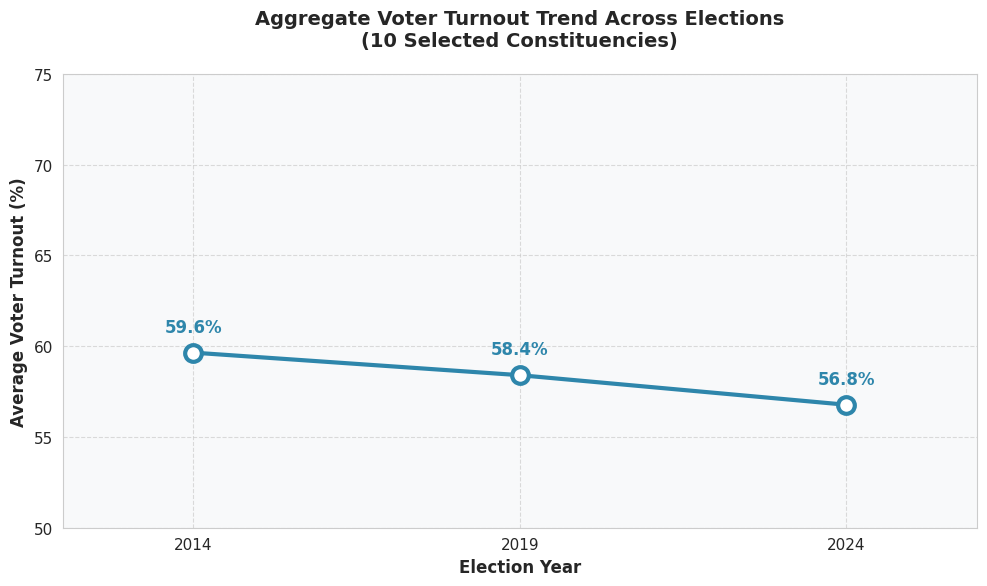

📊 Aggregate Turnout by Year:
 Year  Avg_Turnout
 2014     59.64255
 2019     58.40100
 2024     56.77200


In [3]:
# Visualization (a): Line Chart - Voter Turnout Over Time using Matplotlib/Seaborn

# Calculate aggregate turnout by year
aggregate_by_year = df.groupby('Year')['Turnout_Percent'].mean().reset_index()
aggregate_by_year.columns = ['Year', 'Avg_Turnout']

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot line chart with markers
colors = ['#2E86AB', '#A23B72', '#F18F01']  # Custom color palette
ax.plot(aggregate_by_year['Year'], aggregate_by_year['Avg_Turnout'], 
        marker='o', markersize=12, linewidth=3, color='#2E86AB',
        markerfacecolor='white', markeredgewidth=3)

# Add data labels
for i, row in aggregate_by_year.iterrows():
    ax.annotate(f'{row["Avg_Turnout"]:.1f}%', 
                xy=(row['Year'], row['Avg_Turnout']),
                xytext=(0, 15), textcoords='offset points',
                ha='center', fontsize=12, fontweight='bold',
                color='#2E86AB')

# Customize axes
ax.set_xlabel('Election Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Voter Turnout (%)', fontsize=12, fontweight='bold')
ax.set_title('Aggregate Voter Turnout Trend Across Elections\n(10 Selected Constituencies)', 
             fontsize=14, fontweight='bold', pad=20)

# Set axis limits and ticks
ax.set_xticks([2014, 2019, 2024])
ax.set_ylim(50, 75)
ax.set_xlim(2012, 2026)

# Add grid for better readability
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_facecolor('#f8f9fa')

# Add a subtle background
fig.patch.set_facecolor('white')

plt.tight_layout()
plt.savefig('cleaned_data/viz_a_turnout_over_time.png', dpi=150, bbox_inches='tight')
plt.show()

print("📊 Aggregate Turnout by Year:")
print(aggregate_by_year.to_string(index=False))

## 3. Visualization (b): Voter Turnout Across Genders (Aggregate Level)

**Objective:** Show case change in voter turnout ratio at the aggregate level – across genders

This grouped bar chart compares voter turnout between Male, Female, and Third Gender voters across all three election years.

**Gestalt Principles Applied:**
- **Similarity**: Same colors represent the same gender category across years
- **Proximity**: Bars for each year are grouped together for easy comparison

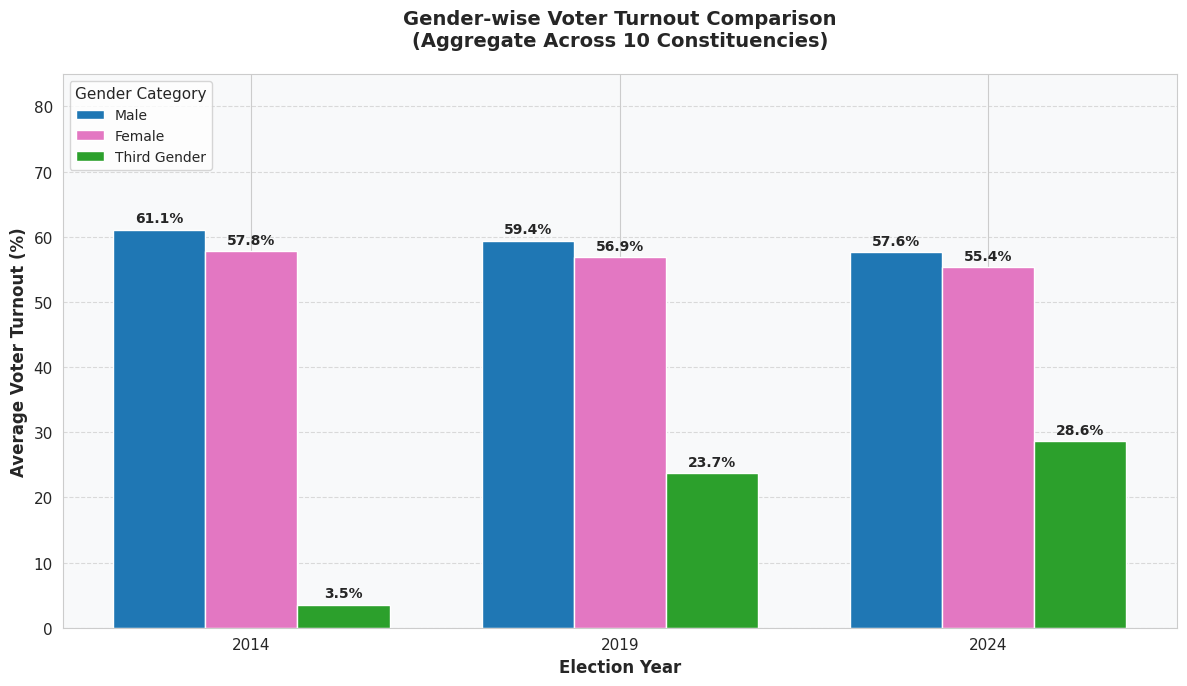


📊 Gender-wise Average Turnout by Year:
 Year  Turnout_Male  Turnout_Female  Turnout_TG
 2014     61.102145       57.830097    3.538612
 2019     59.417000       56.875000   23.701000
 2024     57.587000       55.358000   28.635000


In [4]:
# Visualization (b): Grouped Bar Chart - Gender-wise Voter Turnout using Seaborn

# Calculate average turnout by year and gender
gender_data = df.groupby('Year').agg({
    'Turnout_Male': 'mean',
    'Turnout_Female': 'mean',
    'Turnout_TG': 'mean'
}).reset_index()

# Reshape data for plotting
gender_melted = pd.melt(gender_data, id_vars=['Year'], 
                        value_vars=['Turnout_Male', 'Turnout_Female', 'Turnout_TG'],
                        var_name='Gender', value_name='Turnout')

# Clean up gender labels
gender_melted['Gender'] = gender_melted['Gender'].map({
    'Turnout_Male': 'Male',
    'Turnout_Female': 'Female', 
    'Turnout_TG': 'Third Gender'
})

# Create figure
fig, ax = plt.subplots(figsize=(12, 7))

# Define colors - using a colorblind-friendly palette
colors = {'Male': '#1f77b4', 'Female': '#e377c2', 'Third Gender': '#2ca02c'}

# Create grouped bar chart
bar_width = 0.25
years = sorted(gender_data['Year'].unique())
x = np.arange(len(years))

for i, gender in enumerate(['Male', 'Female', 'Third Gender']):
    data = gender_melted[gender_melted['Gender'] == gender]
    bars = ax.bar(x + i*bar_width, data['Turnout'].values, bar_width, 
                  label=gender, color=colors[gender], edgecolor='white', linewidth=1)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customize chart
ax.set_xlabel('Election Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Voter Turnout (%)', fontsize=12, fontweight='bold')
ax.set_title('Gender-wise Voter Turnout Comparison\n(Aggregate Across 10 Constituencies)', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x + bar_width)
ax.set_xticklabels(years, fontsize=11)
ax.set_ylim(0, 85)

# Add legend
ax.legend(title='Gender Category', loc='upper left', fontsize=10)

# Add grid
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_facecolor('#f8f9fa')

plt.tight_layout()
plt.savefig('cleaned_data/viz_b_turnout_by_gender.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📊 Gender-wise Average Turnout by Year:")
print(gender_data.to_string(index=False))

## 4. Visualization (c): Distribution of Voter Turnout Across Constituencies and Time

**Objective:** Show case distribution of voter turnout – across constituencies and across time

This heatmap visualizes how voter turnout varies across all 10 constituencies over the three election years.

**Gestalt Principles Applied:**
- **Common Region**: Each cell represents a unique constituency-year combination
- **Similarity**: Color intensity indicates turnout level - darker = higher turnout

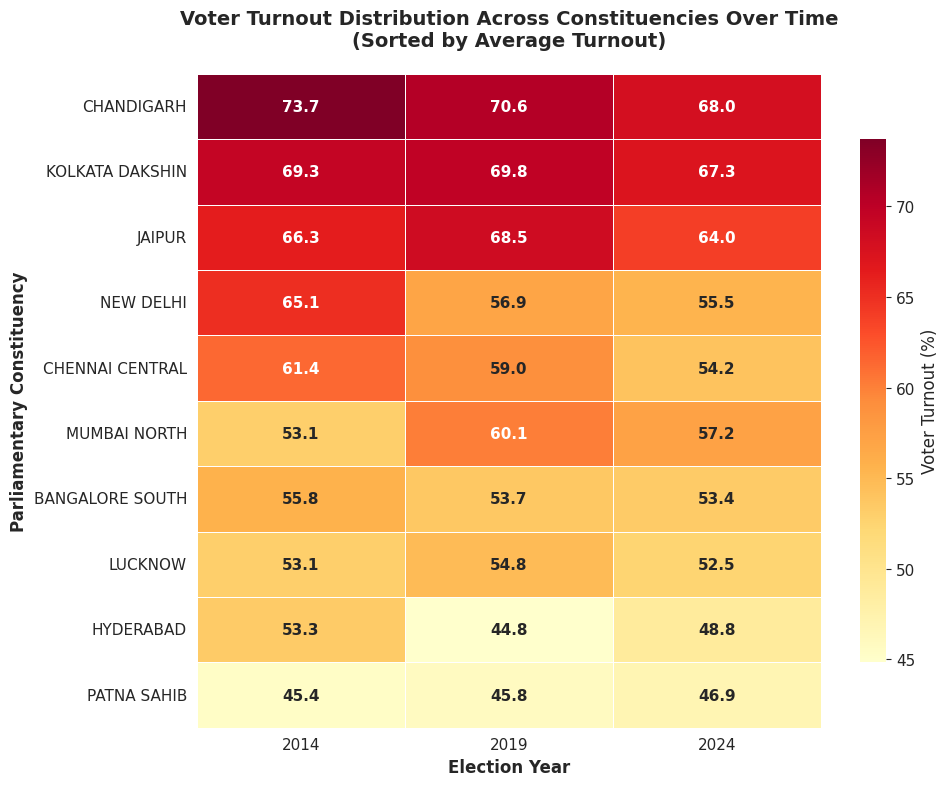


📊 Turnout Summary by Constituency:
Highest Average: CHANDIGARH (70.8%)
Lowest Average: PATNA SAHIB (46.0%)


In [5]:
# Visualization (c): Heatmap - Turnout Across Constituencies and Time using Seaborn

# Pivot data for heatmap
heatmap_data = df.pivot(index='PC_Name', columns='Year', values='Turnout_Percent')

# Sort by average turnout for better visualization
heatmap_data['Average'] = heatmap_data.mean(axis=1)
heatmap_data = heatmap_data.sort_values('Average', ascending=False)
heatmap_data = heatmap_data.drop('Average', axis=1)

# Create figure
fig, ax = plt.subplots(figsize=(10, 8))

# Create heatmap with annotations
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlOrRd',
            linewidths=0.5, linecolor='white',
            cbar_kws={'label': 'Voter Turnout (%)', 'shrink': 0.8},
            annot_kws={'size': 11, 'weight': 'bold'},
            ax=ax)

# Customize
ax.set_title('Voter Turnout Distribution Across Constituencies Over Time\n(Sorted by Average Turnout)', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Election Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Parliamentary Constituency', fontsize=12, fontweight='bold')

# Rotate y-axis labels for readability
plt.yticks(rotation=0)
plt.xticks(fontsize=11)

plt.tight_layout()
plt.savefig('cleaned_data/viz_c_heatmap_constituency_time.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📊 Turnout Summary by Constituency:")
print(f"Highest Average: {heatmap_data.mean(axis=1).idxmax()} ({heatmap_data.mean(axis=1).max():.1f}%)")
print(f"Lowest Average: {heatmap_data.mean(axis=1).idxmin()} ({heatmap_data.mean(axis=1).min():.1f}%)")

## 5. Visualization (d): Distribution of Voter Turnout Across Constituencies and Genders

**Objective:** Show case distribution of voter turnout – across constituencies and genders

This multi-panel visualization shows how male and female voter turnout differs across all constituencies.

**Gestalt Principles Applied:**
- **Figure-Ground**: Clear separation between different constituency bars
- **Enclosure**: Grouped bars for each constituency create visual boundaries
- **Continuity**: Consistent positioning allows easy comparison across genders

In [6]:
# Visualization (d): Gender-wise Turnout Across Constituencies using Bokeh (Interactive)

from bokeh.layouts import column
from bokeh.models import FactorRange

# Aggregate data by constituency
constituency_gender = df.groupby('PC_Name').agg({
    'Turnout_Male': 'mean',
    'Turnout_Female': 'mean',
    'Turnout_Percent': 'mean'
}).reset_index()

# Sort by total turnout
constituency_gender = constituency_gender.sort_values('Turnout_Percent', ascending=True)

# Prepare data for grouped bar chart
constituencies = constituency_gender['PC_Name'].tolist()
genders = ['Male', 'Female']

# Create x-coordinates as tuples for grouped bars
x = [(const, gender) for const in constituencies for gender in genders]
counts = []
for const in constituencies:
    row = constituency_gender[constituency_gender['PC_Name'] == const]
    counts.append(row['Turnout_Male'].values[0])
    counts.append(row['Turnout_Female'].values[0])

# Create ColumnDataSource
source = ColumnDataSource(data=dict(x=x, counts=counts))

# Create figure
p = figure(x_range=FactorRange(*x), height=450, width=900,
           title="Gender-wise Voter Turnout Across Constituencies (Average 2014-2024)",
           toolbar_location="above",
           tools="pan,box_zoom,reset,save")

# Add bars with color mapping
p.vbar(x='x', top='counts', width=0.8, source=source,
       fill_color=factor_cmap('x', palette=['#1f77b4', '#e377c2'], 
                               factors=genders, start=1, end=2),
       line_color='white', line_width=1)

# Add hover tool
hover = HoverTool(tooltips=[
    ("Constituency", "@x"),
    ("Turnout", "@counts{0.1}%")
])
p.add_tools(hover)

# Customize appearance
p.y_range.start = 0
p.y_range.end = 80
p.x_range.range_padding = 0.05
p.xgrid.grid_line_color = None
p.xaxis.major_label_orientation = 0.8
p.yaxis.axis_label = "Average Voter Turnout (%)"
p.title.text_font_size = "14pt"

show(p)

print("\n📊 Gender Turnout Gap by Constituency:")
constituency_gender['Gender_Gap'] = constituency_gender['Turnout_Female'] - constituency_gender['Turnout_Male']
for _, row in constituency_gender.iterrows():
    gap = row['Gender_Gap']
    symbol = "↑" if gap > 0 else "↓"
    print(f"  {row['PC_Name']}: {symbol} {abs(gap):.1f}% {'(Female higher)' if gap > 0 else '(Male higher)'}")


📊 Gender Turnout Gap by Constituency:
  PATNA SAHIB: ↓ 5.9% (Male higher)
  HYDERABAD: ↓ 3.8% (Male higher)
  LUCKNOW: ↓ 3.9% (Male higher)
  BANGALORE SOUTH: ↓ 0.1% (Male higher)
  MUMBAI NORTH: ↓ 2.1% (Male higher)
  CHENNAI CENTRAL: ↓ 3.6% (Male higher)
  NEW DELHI: ↓ 0.3% (Male higher)
  JAIPUR: ↓ 4.6% (Male higher)
  KOLKATA DAKSHIN: ↓ 2.4% (Male higher)
  CHANDIGARH: ↓ 0.1% (Male higher)


## 6. Summary and Key Insights

In [7]:
# Summary Statistics and Insights
print("=" * 60)
print("📊 VISUALIZATION SUMMARY - VOTER TURNOUT ANALYSIS")
print("=" * 60)

# 1. Temporal Analysis
yearly_avg = df.groupby('Year')['Turnout_Percent'].mean()
print("\n🕐 TEMPORAL TRENDS:")
print(f"   • 2014: {yearly_avg[2014]:.1f}%")
print(f"   • 2019: {yearly_avg[2019]:.1f}%")
print(f"   • 2024: {yearly_avg[2024]:.1f}%")
trend = "increasing" if yearly_avg[2024] > yearly_avg[2014] else "decreasing"
print(f"   • Overall Trend: Voter turnout is {trend}")

# 2. Gender Analysis
gender_avg = df[['Turnout_Male', 'Turnout_Female', 'Turnout_TG']].mean()
print("\n👥 GENDER ANALYSIS:")
print(f"   • Male Turnout: {gender_avg['Turnout_Male']:.1f}%")
print(f"   • Female Turnout: {gender_avg['Turnout_Female']:.1f}%")
print(f"   • Third Gender Turnout: {gender_avg['Turnout_TG']:.1f}%")
if gender_avg['Turnout_Female'] > gender_avg['Turnout_Male']:
    print("   • Insight: Female voters show higher turnout than males!")

# 3. Constituency Analysis
const_avg = df.groupby('PC_Name')['Turnout_Percent'].mean().sort_values(ascending=False)
print("\n🏙️ CONSTITUENCY PERFORMANCE:")
print(f"   • Highest Turnout: {const_avg.index[0]} ({const_avg.iloc[0]:.1f}%)")
print(f"   • Lowest Turnout: {const_avg.index[-1]} ({const_avg.iloc[-1]:.1f}%)")
print(f"   • Range: {const_avg.max() - const_avg.min():.1f}% difference")

print("\n" + "=" * 60)
print("📁 All visualizations saved to 'cleaned_data/' folder")
print("=" * 60)

📊 VISUALIZATION SUMMARY - VOTER TURNOUT ANALYSIS

🕐 TEMPORAL TRENDS:
   • 2014: 59.6%
   • 2019: 58.4%
   • 2024: 56.8%
   • Overall Trend: Voter turnout is decreasing

👥 GENDER ANALYSIS:
   • Male Turnout: 59.4%
   • Female Turnout: 56.7%
   • Third Gender Turnout: 18.6%

🏙️ CONSTITUENCY PERFORMANCE:
   • Highest Turnout: CHANDIGARH (70.8%)
   • Lowest Turnout: PATNA SAHIB (46.0%)
   • Range: 24.8% difference

📁 All visualizations saved to 'cleaned_data/' folder
